# (Students Performance Exploration )
## by (Basant Hussein)

## Preliminary Wrangling

> The Inspiration is to understand the influence of the parents background, test preparation etc on students performance. the dataset comprises of 1,000 rows and 8 columns, with which we continue to determine what all the features which plays a vital role in affecting the student's performance.

> The dataset consists of the marks secured by the students in various subjects, which accessible from Kaggle Student Performance in Exams. there are 1000 occurance and 8 columns:

> 1. gender
> 2. race / ethnicity
> 3. parental level of education
> 4. lunch
> 5. test preparation course
> 6. math score
> 7. reading score
> 8. writing score

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
#read the dataset and print the head
df=pd.read_csv('StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#  the shape of the dataset
df.shape

(1000, 8)

### What is the structure of your dataset?

> The structure of the dataset is 1000 observation "rows" and 8 columns

### What is/are the main feature(s) of interest in your dataset?

> The main features are : math score, reading score, writing score

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> test preparation course, parental level of education

## Univariate Exploration
> In univariate exploration i will first explore the features and see if it needs cleaning or something is not normal,Then visualize the features of interest.


Text(0, 0.5, 'count')

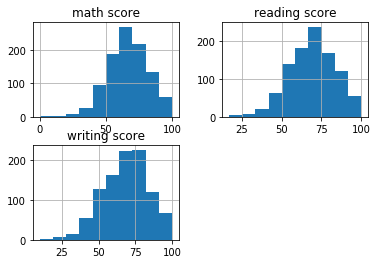

In [4]:
# histogram of subjects's scores
df.hist()
plt.ylabel("count")

> The distribution is normal but there is a small skew or outliers in the left

Text(0, 0.5, 'count')

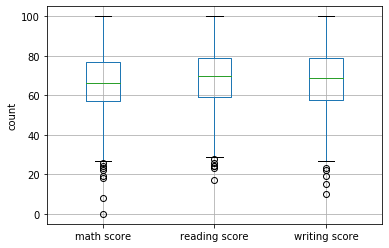

In [5]:
# boxplot to check accuratlly the outliers
df.boxplot()
plt.ylabel("count")

> Their is a few outliers, in math score is less than 26, in reading score is less than 29, in writing score is less than 25.

In [6]:
# print the statistical descriptive
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
# check if their is a null values
df.isnull().any()

gender                         False
race/ethnicity                 False
parental level of education    False
lunch                          False
test preparation course        False
math score                     False
reading score                  False
writing score                  False
dtype: bool

In [8]:
# check if there is a duplicates
df.duplicated().sum()

0

In [9]:
# function to return the observations of the outliers
def outliers(subject_score):
    if subject_score=='math_score':     
        return df[df[subject_score]<26].shape[0]
    elif subject_score=='reading_score':
        return df[df[subject_score]<29].shape[0]
    elif subject_score=='writing_score':
        return df[df[subject_score]<25].shape[0]

In [10]:
# replace the column's name with underscore rather than space
df.columns = df.columns.str.replace(' ','_')
df.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
# print math score outliers
outliers('math_score')

7

In [12]:
# print reading score outliers
outliers('reading_score')

6

In [13]:
# print writing score outliers
outliers('writing_score')

5

Text(0, 0.5, 'count')

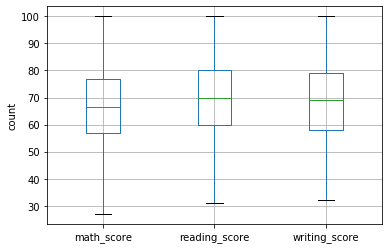

In [14]:
# skip the outliers in the subjects's scores
df_new=df.query('math_score > 26 & reading_score > 29 & writing_score > 25')
df_new.boxplot()
plt.ylabel("count")

> their is no outliers in subjects's scores

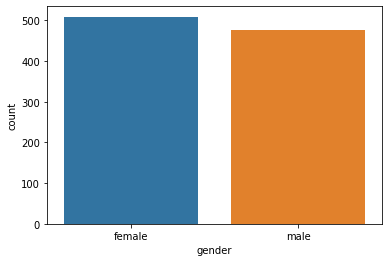

In [15]:
# countplot of gender variable
sb.countplot(data=df_new,x='gender')

> The female's count seems to be more than the male's count, but not with a large difference

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

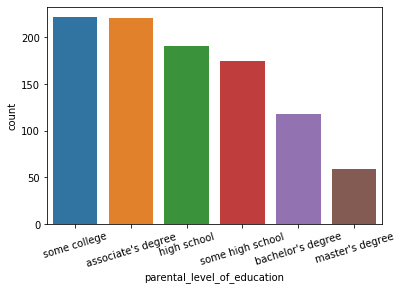

In [16]:
# the countplot for parental_level_of_education
arrange=df_new.parental_level_of_education.value_counts().index
sb.countplot(data=df_new,x='parental_level_of_education',order=arrange)
plt.xticks(rotation=17)

> The counts of some college is the largest, and master's degree is the lowest

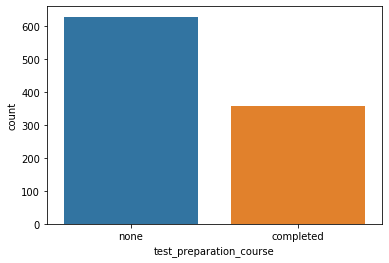

In [17]:
# countplot for test_preparation_course
sb.countplot(data=df_new,x='test_preparation_course')

> The count of none is larger than completed

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distribution of subjects scores are normal distribution, Their is a small outliers so i skipped those values.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Their is a small outliers so i skipped those values, because they are very small so i prefered to skip those values rather than to make any transformation, as they will not make a big effect on the results.

> i changed the columns names, replaced the spaces with underscores to make the processing easy.

## Bivariate Exploration
> In bivariate exploration i will visualize each feature of interest with the subject score, and also explore the relation between the scores of the subjects.


Text(0.5, 1.0, 'parental_level_of_education vs writing_score')

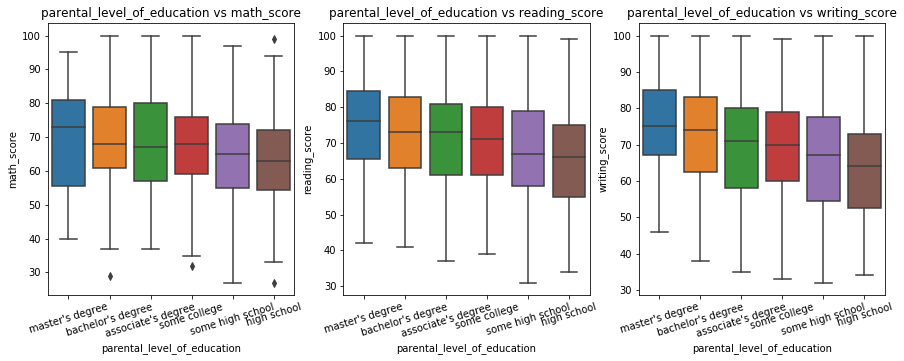

In [18]:
# figure size
plt.figure(figsize = [15, 5])
# LEFT plot
plt.subplot(1, 3, 1)
# boxplot of parental_level_of_education with  math_score
group_mean = df_new.groupby(['parental_level_of_education']).mean()
group_order = group_mean.sort_values(['math_score'], ascending = False).index
sb.boxplot(data=df_new,x='parental_level_of_education',y='math_score',order=group_order)
plt.xticks(rotation=17)
plt.title("parental_level_of_education vs math_score")

#middle plot
plt.subplot(1, 3, 2)
# boxplot of parental_level_of_education with  reading_score
group_mean = df_new.groupby(['parental_level_of_education']).mean()
group_order = group_mean.sort_values(['reading_score'], ascending = False).index
sb.boxplot(data=df_new,x='parental_level_of_education',y='reading_score',order=group_order)
plt.xticks(rotation=17)
plt.title("parental_level_of_education vs reading_score")

# right plot
plt.subplot(1, 3, 3)
# boxplot of parental_level_of_education with  reading_score
group_mean = df_new.groupby(['parental_level_of_education']).mean()
group_order = group_mean.sort_values(['writing_score'], ascending = False).index
sb.boxplot(data=df_new,x='parental_level_of_education',y='writing_score',order=group_order)
plt.xticks(rotation=17)
plt.title("parental_level_of_education vs writing_score")


> 1. The masters degree's median is the largest, and high school is the lowest, with math score.

> 2. The median also in master's degree is the largest in master's degree with reading score

> 3. The median also in master's degree is the largest in writing score

Text(0.5, 1.0, 'gender vs writing_score')

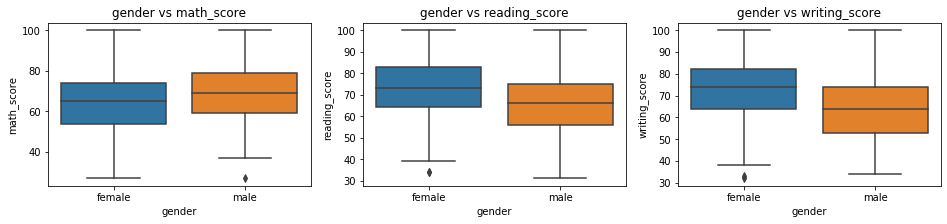

In [19]:
# figure size
plt.figure(figsize = [16, 3])
# LEFT plot
plt.subplot(1, 3, 1)
# boxplot of gender with math_score
sb.boxplot(data=df_new,x='gender',y='math_score')
plt.title("gender vs math_score")

# middle plot
plt.subplot(1, 3, 2)
# boxplot of gender with  reading_score
sb.boxplot(data=df_new,x='gender',y='reading_score')
plt.title("gender vs reading_score")

#right plot
plt.subplot(1, 3, 3)
# boxplot of gender with writing_score
sb.boxplot(data=df_new,x='gender',y='writing_score')
plt.title("gender vs writing_score")

> 1. The median of male in math_score is larger than the female 

> 2. The median of female in reading_score is larger than the male

> 3. The median of female in writing_score is larger than the male

Text(0.5, 1.0, 'test_preparation_course vs writing_score')

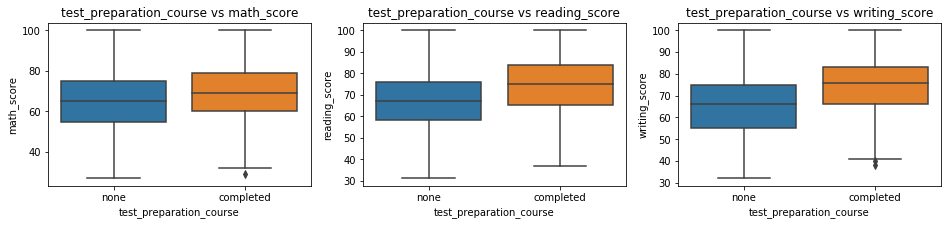

In [20]:
# figure size
plt.figure(figsize = [16, 3])
# LEFT plot
plt.subplot(1, 3, 1)
# boxplot of test_preparation_course with math_score
sb.boxplot(data=df_new,x='test_preparation_course',y='math_score')
plt.title("test_preparation_course vs math_score")

# middle plot
plt.subplot(1, 3, 2)
# boxplot of test_preparation_course with reading_score
sb.boxplot(data=df_new,x='test_preparation_course',y='reading_score')
plt.title("test_preparation_course vs reading_score")

# right plot
plt.subplot(1, 3, 3)
# boxplot of test_preparation_course with writing_score
sb.boxplot(data=df_new,x='test_preparation_course',y='writing_score')
plt.title("test_preparation_course vs writing_score")

> 1. The median of completed in test preparation course is larger than none in math score

> 2. The median of completed in test preparation course is larger than none in reading score

> 3. The median of completed in test preparation course is larger than none in writing score

Text(0.5, 1.0, 'reading_score vs writing_score')

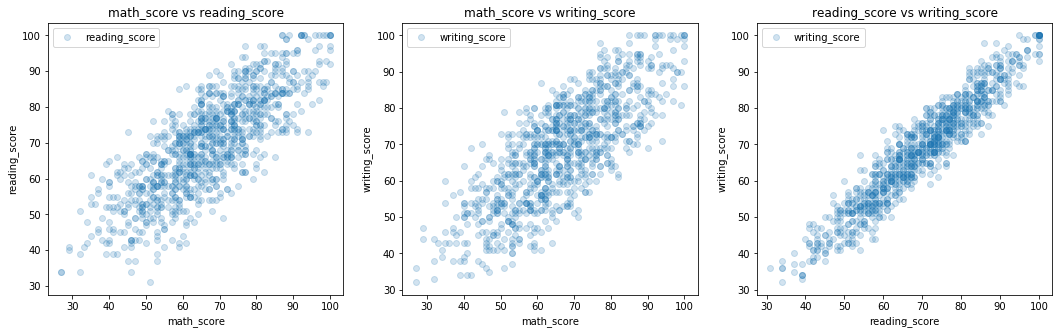

In [21]:
# figure size
plt.figure(figsize = [18, 5])
# LEFT plot
plt.subplot(1, 3, 1)
# scatter plot of math score vs reading score
plt.scatter(data=df_new,x='math_score',y='reading_score',alpha=0.2)
plt.legend()
plt.xlabel('math_score')
plt.ylabel('reading_score')
plt.title('math_score vs reading_score')

# middle plot
plt.subplot(1, 3, 2)
# scatter plot of math score vs writing score
plt.scatter(data=df_new,x='math_score',y='writing_score',alpha=0.2)
plt.legend()
plt.xlabel('math_score')
plt.ylabel('writing_score')
plt.title('math_score vs writing_score')

# right plot
plt.subplot(1, 3, 3)
# scatter plot of reading score vs writing score
plt.scatter(data=df_new,x='reading_score',y='writing_score',alpha=0.2)
plt.legend()
plt.xlabel('reading_score')
plt.ylabel('writing_score')
plt.title('reading_score vs writing_score')

> 1. Their is a positive correlation between math score and reading score

> 2. Their is a positive correlation between math score and writing score

> 3. Their is a positive correlation between reading score and writing score

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> 1. The masters degree's median is the largest in all the subject's scores, despite their count in univarite exploration is the smallest.

> 2. The female's median is larger in reading and writing score, but male's median is larger in math score, despite the female's count is greater than the male's count.

> 3. The median of completed in test preparation is larger than none in all the subject's score, despite the count of none in univariate exploration is larger than completed.

> 4. Their is a postive correlation between all the subject's score, which means when a person's score in a subject increase, the other score in another subject increase too.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Parental education is interesting and test preparation aslo, but i found that a gender is also interesting specially that the female's score is higher than male except in math ! which is interesting.

## Multivariate Exploration
> In multivariate i will visulize the multi relation between the scores and the features to be more accurate of our decision of the factors that affects the student's scores.


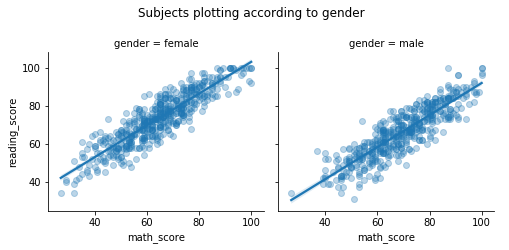

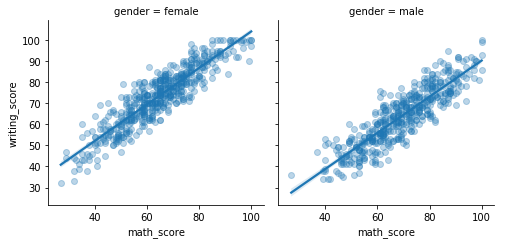

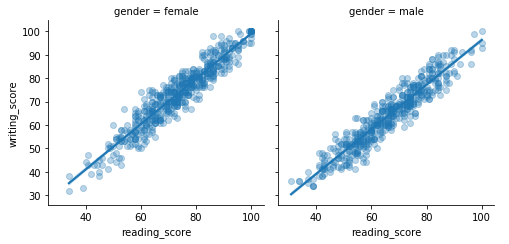

In [22]:
# first plot
# ploting math score, reading score and gender
g=sb.FacetGrid(data=df_new,col='gender',height=3.5)
g.map(sb.regplot,'math_score','reading_score',scatter_kws={'alpha':0.3})
g.add_legend()
# add title
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Subjects plotting according to gender")

# second plot
# ploting math score, writing score and gender
g=sb.FacetGrid(data=df_new,col='gender',height=3.5)
g.map(sb.regplot,'math_score','writing_score',scatter_kws={'alpha':0.3})
g.add_legend()

# third plot
# ploting reading score, writing score and gender
g=sb.FacetGrid(data=df_new,col='gender',height=3.5)
g.map(sb.regplot,'reading_score','writing_score',scatter_kws={'alpha':0.3})
g.add_legend()



> The multivariate exploration of subjects_scores with the gender shows that the scores of females is higher than male's score as a combination of subjects.

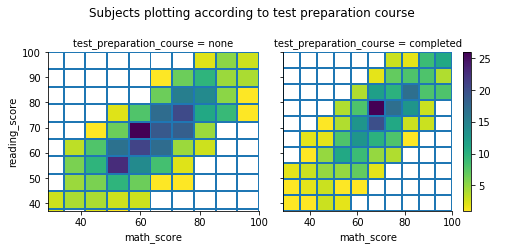

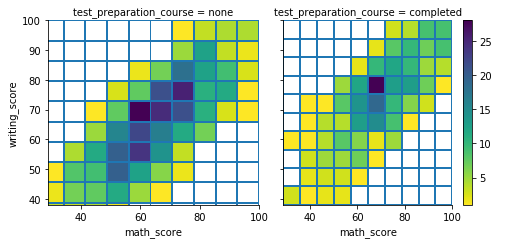

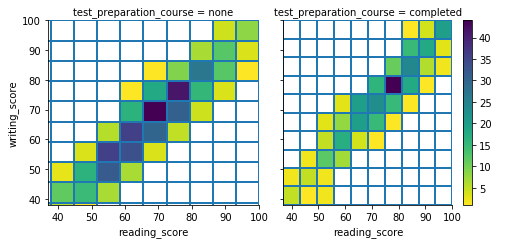

In [30]:
# first plot
# ploting math score, reading score and test preparation course
g=sb.FacetGrid(data=df_new,col='test_preparation_course',height=3.5)
g.map(plt.hist2d,'math_score','reading_score',cmin=0.5,cmap='viridis_r')
plt.colorbar()
g.add_legend()
# add title
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Subjects plotting according to test preparation course")

# second plot
# ploting math score, writing score and gender
g=sb.FacetGrid(data=df_new,col='test_preparation_course',height=3.5)
g.map(plt.hist2d,'math_score','writing_score',cmin=0.5,cmap='viridis_r')
plt.colorbar()
g.add_legend()

# third plot
# ploting reading score, writing score and gender
g=sb.FacetGrid(data=df_new,col='test_preparation_course',height=3.5)
g.map(plt.hist2d,'reading_score','writing_score',cmin=0.5,cmap='viridis_r')
plt.colorbar()
g.add_legend()

> The concentration of subjects scores in test preparation course =none is more than test preparation course =completed, the concentration of scores also is between 60 and 80.

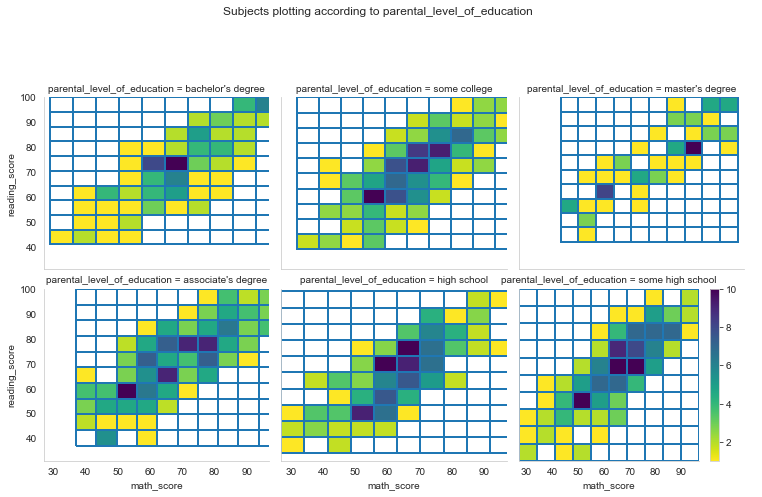

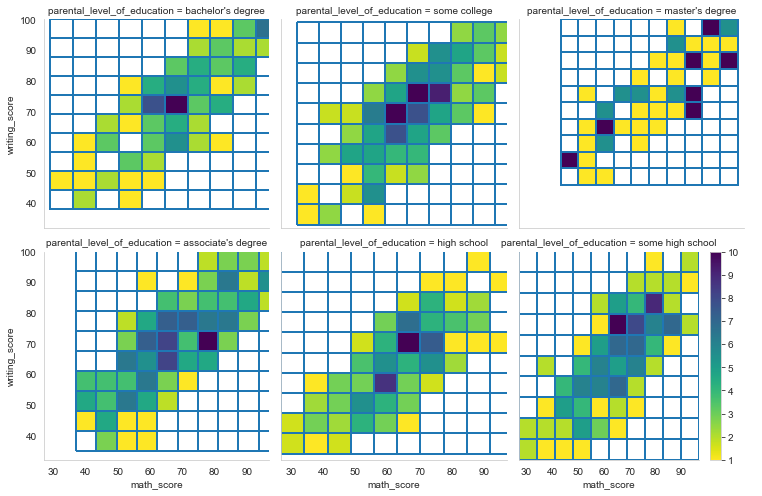

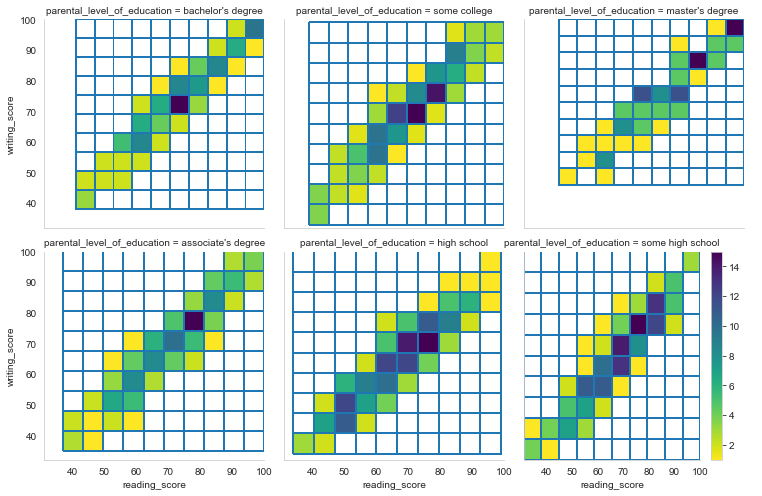

In [75]:
# first plot

# ploting math score, reading score and parental_level_of_education
g=sb.FacetGrid(data=df_new,col='parental_level_of_education',height=3.5,col_wrap=3, sharex=True, sharey=True, legend_out=True,margin_titles=False, gridspec_kws=None)
g.map(plt.hist2d,'math_score','reading_score',cmin=0.5,cmap='viridis_r')
plt.colorbar()
g.add_legend()
sb.set_style("whitegrid", {'axes.grid' : False})
# add title
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Subjects plotting according to parental_level_of_education")

# second plot
# ploting math score, writing score and parental_level_of_education
g=sb.FacetGrid(data=df_new,col='parental_level_of_education',height=3.5,col_wrap=3, sharex=True, sharey=True, legend_out=True,margin_titles=False, gridspec_kws=None)
g.map(plt.hist2d,'math_score','writing_score',cmin=0.5,cmap='viridis_r')
plt.colorbar()
g.add_legend()

# third plot
# ploting reading score, writing score and parental_level_of_education
g=sb.FacetGrid(data=df_new,col='parental_level_of_education',height=3.5,col_wrap=3, sharex=True, sharey=True, legend_out=True,margin_titles=False, gridspec_kws=None)
g.map(plt.hist2d,'reading_score','writing_score',cmin=0.5,cmap='viridis_r')
plt.colorbar()
g.add_legend()

> 1. The concentration of parental level education of associate degree,some collage,high school in math score with reading score is the highest.

> 2. The concentration of parental level education of associate degree,some collage in math score with writing score is the highest.

> 3. The concentration of parental level education of high school, associate degree,some collage in reading score with writing score is the highest.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes the score of female in math was lower than male in math in bivarite exploration, but in multivarite they strengthened each other and become higher than male.

### Were there any interesting or surprising interactions between features?

> Yes, first in bivariate in test preparation course feature the median in completed is larger in all the subjects score, but in multivariate the none value for test preparation course seems to be more strength than completed.

> second in bivairate in parental level of education feature the median of master's degree is the highest, but in multivariate the strengh of master's degree is week, but still some higher degree is more strenght like associate degree and college.

#### I Decided to go with hypothsis testing to take a clear decision about test preparation course does it affect the score or not, the null hypothesis is it does'nt affect the scores, and the alternative is it affects the score.

> ##### H0: Psc-Psn <= 0
> ##### H1: Psc-Psn > 0

In [60]:
# compute the mean of subjects score in test preparation course equals completed
completed_df=df_new.query('test_preparation_course=="completed"')
scores_completed=completed_df['math_score'].mean() + completed_df['reading_score'].mean() + completed_df['writing_score'].mean()
scores_completed

218.33053221288515

In [61]:
# compute the mean of subjects score in test preparation course equals none
none_df=df_new.query('test_preparation_course=="none"')
scores_none=none_df['math_score'].mean() + none_df['reading_score'].mean() + none_df['writing_score'].mean()
scores_none

197.53736089030207

In [62]:
# observed difference
obs_diff=scores_completed-scores_none
obs_diff

20.793171322583078

In [63]:
# Create a sampling distribution of the difference in proportions
# with bootstrapping
diffs=[]
size=df_new.shape[0]
for _ in range(100000):
    d_samp=df_new.sample(size,replace=True)
    completed_df=d_samp.query('test_preparation_course=="completed"')
    none_df=d_samp.query('test_preparation_course=="none"')
    scores_completed=completed_df['math_score'].mean() + completed_df['reading_score'].mean() + completed_df['writing_score'].mean()
    scores_none=none_df['math_score'].mean() + none_df['reading_score'].mean() + none_df['writing_score'].mean()
    diffs.append(scores_completed-scores_none)


(array([1.0000e+01, 2.4400e+02, 2.8670e+03, 1.3744e+04, 3.0726e+04,
        3.2491e+04, 1.5890e+04, 3.6740e+03, 3.3600e+02, 1.8000e+01]),
 array([ 9.00519003, 11.33199264, 13.65879526, 15.98559787, 18.31240048,
        20.6392031 , 22.96600571, 25.29280832, 27.61961094, 29.94641355,
        32.27321616]),
 <a list of 10 Patch objects>)

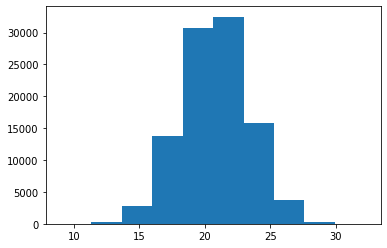

In [64]:
# convert to numpy array
diffs=np.array(diffs)
# plot the sampling distribution
plt.hist(diffs)

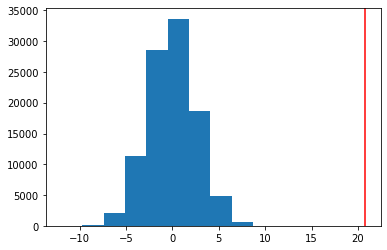

In [65]:
# simulate the null values
null_vals=np.random.normal(0,diffs.std(),diffs.size)
# plot the null values and the observed statistic
plt.hist(null_vals)
plt.axvline(obs_diff,c='red')

In [66]:
# compute p-value
(null_vals > obs_diff).mean()

0.0

> #### The p-value is zero which is statistically significant to reject the null and accept the alternative which is the test preparation course has an effect on the student's scores in the subject.

### Conclusion 
> In this project i was trying to find the factors that affect the student's performance and the result is:
> 1. The female's total scores in subjects are greater than male.
> 2. Their is a positive relation between the scores of the subject with each other, which means for example when the student score in reading increase his score in writing is increasing too.
> 3. The parental level of education affect the student's scores, not specially masters degree or bachleor, but associate degree and some college achieve a higher rate to their student's scores.
> 4. After doing a hypothesis testing on test preparation course, the result is  the test preparation course has an effect on the student's scores in the subject.

### Resources
> https://rstudio-pubs-static.s3.amazonaws.com/517704_199c58baabf44be287a93a4c1aacd4d9.html

> https://seaborn.pydata.org/

> https://matplotlib.org/contents.html